In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import glob
import pickle
import seaborn as sns
import cv2 as cv
import pims
import trackpy as tp
import os

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
coords = pd.read_hdf('/Users/felix/Documents/mosquitoes/mosquitoData/biteData/DEET/191022_col_DEET_02_38000-39999crops_p9/191022_col_DEET_02_38000-39999crops_p9DeepCut_resnet50_anopheles01Nov19shuffle1_296000.h5')
t = pickle.load(open('/Users/felix/Documents/mosquitoes/mosquitoData/biteData/DEET/191022_col_DEET_02_38000-39999crops_p9/191022_col_DEET_02_38000-39999_p9_tStats.pkl', 'rb'))

In [4]:
dataDir = '/Users/felix/Documents/mosquitoes/mosquitoData/biteData/DEET/'
saveDir = '/Users/felix/Documents/mosquitoes/mosquitoData/biteData/DEET/'

frames = pims.ImageSequence(dataDir+'/*.tiff', as_grey=True)
DEETmask = cv.imread(dataDir + '/DEET_mask_39204.tif')
DEETmask = cv.cvtColor(DEETmask, cv.COLOR_BGR2GRAY)

In [5]:
coords.head()

scorer                DeepCut_resnet50_anopheles01Nov19shuffle1_296000  \
bodyparts                                                 rightForeleg   
coords                                                               x   
crop_p009_f038975.png                                       439.241285   
crop_p009_f038976.png                                       503.896836   
crop_p009_f038977.png                                       503.157931   
crop_p009_f038978.png                                       497.876717   
crop_p009_f038979.png                                       499.147981   

scorer                                                                   \
bodyparts                                    rightMiddleLeg               
coords                          y likelihood              x           y   
crop_p009_f038975.png   17.751134   0.122119     441.374572   15.318182   
crop_p009_f038976.png  117.760746   0.004775     383.684370  241.403011   
crop_p009_f038977.png  548.922519   0.014992     285.565237   74.286410   
crop_p009_f038978.png  544.765467   0.576913     290.164462   80.502950   
crop_p009_f038979.png  547.649243   0.071556     289.059284   80.836728   

scorer                                                                \
bodyparts                        rightHindLeg                          
coords                likelihood            x           y likelihood   
crop_p009_f038975.png   0.671473   441.834197   16.566576   0.968385   
crop_p009_f038976.png   0.019099   170.003159  331.988832   0.006449   
crop_p009_f038977.png   0.017284   286.709203   74.794236   0.268983   
crop_p009_f038978.png   0.202189   289.809258   79.954055   0.998313   
crop_p009_f038979.png   0.227886   290.862329   80.599342   0.952950   

scorer                             ...                                     \
bodyparts             leftForeleg  ...  proboscis        head               
coords                          x  ... likelihood           x           y   
crop_p009_f038975.png  442.433873  ...   0.150296  539.722549  309.131110   
crop_p009_f038976.png  476.319741  ...   0.089087  535.099370  289.242555   
crop_p009_f038977.png  464.973735  ...   0.273973  535.069777  291.584047   
crop_p009_f038978.png  445.034880  ...   0.210981  551.205220  295.036567   
crop_p009_f038979.png  466.631041  ...   0.032823  564.119456  295.226429   

scorer                                                               \
bodyparts                            abdomen                          
coords                likelihood           x           y likelihood   
crop_p009_f038975.png   0.999999  491.199030  294.713457   0.999982   
crop_p009_f038976.png   0.999922  487.123755  280.279924   0.996787   
crop_p009_f038977.png   1.000000  484.253198  286.141311   0.999999   
crop_p009_f038978.png   0.999972  493.840490  286.335634   0.999998   
crop_p009_f038979.png   0.637654  499.777152  287.508695   0.999998   

scorer                                                    
bodyparts                  bottom                         
coords                          x           y likelihood  
crop_p009_f038975.png  393.405350  250.249380        1.0  
crop_p009_f038976.png  387.752613  240.149886        1.0  
crop_p009_f038977.png  378.213961  254.698584        1.0  
crop_p009_f038978.png  382.996684  261.015227        1.0  
crop_p009_f038979.png  392.723397  261.970136        1.0  

[5 rows x 33 columns]

In [6]:
coords.columns = coords.columns.droplevel()

for i in coords.index:
    coords.loc[i, ('','frame')] = int(i[i.find('_f') + 2 : i.find('.png')])
    
for i in coords.index:
    coords.loc[i, ('','particle')] = int(i[i.find('_p') + 2 : i.find('_f')])

In [7]:
coords.head()

bodyparts             rightForeleg                        rightMiddleLeg  \
coords                           x           y likelihood              x   
crop_p009_f038975.png   439.241285   17.751134   0.122119     441.374572   
crop_p009_f038976.png   503.896836  117.760746   0.004775     383.684370   
crop_p009_f038977.png   503.157931  548.922519   0.014992     285.565237   
crop_p009_f038978.png   497.876717  544.765467   0.576913     290.164462   
crop_p009_f038979.png   499.147981  547.649243   0.071556     289.059284   

bodyparts                                    rightHindLeg              \
coords                          y likelihood            x           y   
crop_p009_f038975.png   15.318182   0.671473   441.834197   16.566576   
crop_p009_f038976.png  241.403011   0.019099   170.003159  331.988832   
crop_p009_f038977.png   74.286410   0.017284   286.709203   74.794236   
crop_p009_f038978.png   80.502950   0.202189   289.809258   79.954055   
crop_p009_f038979.png   80.836728   0.227886   290.862329   80.599342   

bodyparts                        leftForeleg  ...        head             \
coords                likelihood           x  ...           y likelihood   
crop_p009_f038975.png   0.968385  442.433873  ...  309.131110   0.999999   
crop_p009_f038976.png   0.006449  476.319741  ...  289.242555   0.999922   
crop_p009_f038977.png   0.268983  464.973735  ...  291.584047   1.000000   
crop_p009_f038978.png   0.998313  445.034880  ...  295.036567   0.999972   
crop_p009_f038979.png   0.952950  466.631041  ...  295.226429   0.637654   

bodyparts                 abdomen                             bottom  \
coords                          x           y likelihood           x   
crop_p009_f038975.png  491.199030  294.713457   0.999982  393.405350   
crop_p009_f038976.png  487.123755  280.279924   0.996787  387.752613   
crop_p009_f038977.png  484.253198  286.141311   0.999999  378.213961   
crop_p009_f038978.png  493.840490  286.335634   0.999998  382.996684   
crop_p009_f038979.png  499.777152  287.508695   0.999998  392.723397   

bodyparts                                                       
coords                          y likelihood    frame particle  
crop_p009_f038975.png  250.249380        1.0  38975.0      9.0  
crop_p009_f038976.png  240.149886        1.0  38976.0      9.0  
crop_p009_f038977.png  254.698584        1.0  38977.0      9.0  
crop_p009_f038978.png  261.015227        1.0  38978.0      9.0  
crop_p009_f038979.png  261.970136        1.0  38979.0      9.0  

[5 rows x 35 columns]

In [8]:
t.head()

,y,x,frame,particle,species,age,distance,velocity,bellyWidth,bellyArea,mosqLength
15,987.000655,1946.431401,38975,9,col,8,0.678882,6.788820,0.334173,50.0,2.025556
16,993.491109,1972.701261,38976,9,col,8,0.852222,8.522222,0.847749,2621.0,3.080844
17,982.014774,1940.729609,38977,9,col,8,0.061448,0.614478,0.848497,2512.0,2.742652
18,979.669313,1941.435105,38978,9,col,8,0.133797,1.337973,0.829535,2792.0,3.051963
19,977.805876,1946.432028,38979,9,col,8,0.668489,6.684890,0.560929,268.5,1.220846


In [9]:
coordsFF = coords.copy()
ROIs = 550  ### size of ROI (width and height are same)
hROIs = ROIs / 2
FFsize = 2048   ### size of full frame

for j in coords.columns.levels[0]:
    if j:
        for i in coords.index:
            currX = t[t.frame == coordsFF['', 'frame'].loc[i]].x.values
            currY = t[t.frame == coordsFF['', 'frame'].loc[i]].y.values
            if currX > ROIs / 2 and currX < FFsize - hROIs:
                coordsFF[j, 'x'].loc[i] = coordsFF[j, 'x'].loc[i] + currX - hROIs
            elif currX > FFsize - hROIs:
                coordsFF[j, 'x'].loc[i] = coordsFF[j, 'x'].loc[i] + FFsize - ROIs
            if currY > ROIs / 2 and currY < FFsize - hROIs:
                coordsFF[j, 'y'].loc[i] = coordsFF[j, 'y'].loc[i] + currY - hROIs
            elif currY > FFsize - hROIs:
                coordsFF[j, 'y'].loc[i] = coordsFF[j, 'y'].loc[i] + FFsize - ROIs
                


In [10]:
coordsFF2 = coordsFF.copy()
coordsFF2 = coordsFF2.rename(columns={"head": "Head"})
coordsFF2.head()

bodyparts             rightForeleg                         rightMiddleLeg  \
coords                           x            y likelihood              x   
crop_p009_f038975.png  1937.241285   729.751789   0.122119    1939.374572   
crop_p009_f038976.png  2001.896836   836.251854   0.004775    1881.684370   
crop_p009_f038977.png  2001.157931  1255.937293   0.014992    1783.565237   
crop_p009_f038978.png  1995.876717  1249.434780   0.576913    1788.164462   
crop_p009_f038979.png  1997.147981  1250.455119   0.071556    1787.059284   

bodyparts                                    rightHindLeg               \
coords                          y likelihood            x            y   
crop_p009_f038975.png  727.318837   0.671473  1939.834197   728.567231   
crop_p009_f038976.png  959.894120   0.019099  1668.003159  1050.479941   
crop_p009_f038977.png  781.301184   0.017284  1784.709203   781.809010   
crop_p009_f038978.png  785.172263   0.202189  1787.809258   784.623368   
crop_p009_f038979.png  783.642603   0.227886  1788.862329   783.405217   

bodyparts                         leftForeleg  ...         Head             \
coords                likelihood            x  ...            y likelihood   
crop_p009_f038975.png   0.968385  1940.433873  ...  1021.131765   0.999999   
crop_p009_f038976.png   0.006449  1974.319741  ...  1007.733664   0.999922   
crop_p009_f038977.png   0.268983  1962.973735  ...   998.598821   1.000000   
crop_p009_f038978.png   0.998313  1943.034880  ...   999.705880   0.999972   
crop_p009_f038979.png   0.952950  1964.631041  ...   998.032305   0.637654   

bodyparts                  abdomen                               bottom  \
coords                           x            y likelihood            x   
crop_p009_f038975.png  1989.199030  1006.714112   0.999982  1891.405350   
crop_p009_f038976.png  1985.123755   998.771033   0.996787  1885.752613   
crop_p009_f038977.png  1982.253198   993.156084   0.999999  1876.213961   
crop_p009_f038978.png  1991.840490   991.004947   0.999998  1880.996684   
crop_p009_f038979.png  1997.777152   990.314571   0.999998  1890.723397   

bodyparts                                                       
coords                          y likelihood    frame particle  
crop_p009_f038975.png  962.250035        1.0  38975.0      9.0  
crop_p009_f038976.png  958.640995        1.0  38976.0      9.0  
crop_p009_f038977.png  961.713357        1.0  38977.0      9.0  
crop_p009_f038978.png  965.684540        1.0  38978.0      9.0  
crop_p009_f038979.png  964.776012        1.0  38979.0      9.0  

[5 rows x 35 columns]

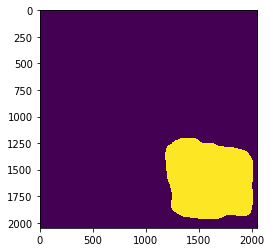

In [11]:
plt.imshow(DEETmask)

In [12]:
cnts, hierarchy = cv.findContours(DEETmask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [13]:
DEETareaCont= np.squeeze(cnts[0])

In [14]:
coordsFF3 = coordsFF2.copy()

for j in coordsFF3.columns.levels[0]:
    
        if j:
            coordsFF3.loc[coordsFF3.loc[:, (j, 'likelihood')] < 0.8, (j, 'x')] = np.nan
            coordsFF3.loc[coordsFF3.loc[:, (j, 'likelihood')] < 0.8, (j, 'y')] = np.nan

In [15]:
coordsFF3.head()

bodyparts             rightForeleg                rightMiddleLeg      \
coords                           x   y likelihood              x   y   
crop_p009_f038975.png          NaN NaN   0.122119            NaN NaN   
crop_p009_f038976.png          NaN NaN   0.004775            NaN NaN   
crop_p009_f038977.png          NaN NaN   0.014992            NaN NaN   
crop_p009_f038978.png          NaN NaN   0.576913            NaN NaN   
crop_p009_f038979.png          NaN NaN   0.071556            NaN NaN   

bodyparts                        rightHindLeg                         \
coords                likelihood            x           y likelihood   
crop_p009_f038975.png   0.671473  1939.834197  728.567231   0.968385   
crop_p009_f038976.png   0.019099          NaN         NaN   0.006449   
crop_p009_f038977.png   0.017284          NaN         NaN   0.268983   
crop_p009_f038978.png   0.202189  1787.809258  784.623368   0.998313   
crop_p009_f038979.png   0.227886  1788.862329  783.405217   0.952950   

bodyparts             leftForeleg  ...         Head                 abdomen  \
coords                          x  ...            y likelihood            x   
crop_p009_f038975.png         NaN  ...  1021.131765   0.999999  1989.199030   
crop_p009_f038976.png         NaN  ...  1007.733664   0.999922  1985.123755   
crop_p009_f038977.png         NaN  ...   998.598821   1.000000  1982.253198   
crop_p009_f038978.png         NaN  ...   999.705880   0.999972  1991.840490   
crop_p009_f038979.png         NaN  ...          NaN   0.637654  1997.777152   

bodyparts                                           bottom              \
coords                           y likelihood            x           y   
crop_p009_f038975.png  1006.714112   0.999982  1891.405350  962.250035   
crop_p009_f038976.png   998.771033   0.996787  1885.752613  958.640995   
crop_p009_f038977.png   993.156084   0.999999  1876.213961  961.713357   
crop_p009_f038978.png   991.004947   0.999998  1880.996684  965.684540   
crop_p009_f038979.png   990.314571   0.999998  1890.723397  964.776012   

bodyparts                                           
coords                likelihood    frame particle  
crop_p009_f038975.png        1.0  38975.0      9.0  
crop_p009_f038976.png        1.0  38976.0      9.0  
crop_p009_f038977.png        1.0  38977.0      9.0  
crop_p009_f038978.png        1.0  38978.0      9.0  
crop_p009_f038979.png        1.0  38979.0      9.0  

[5 rows x 35 columns]

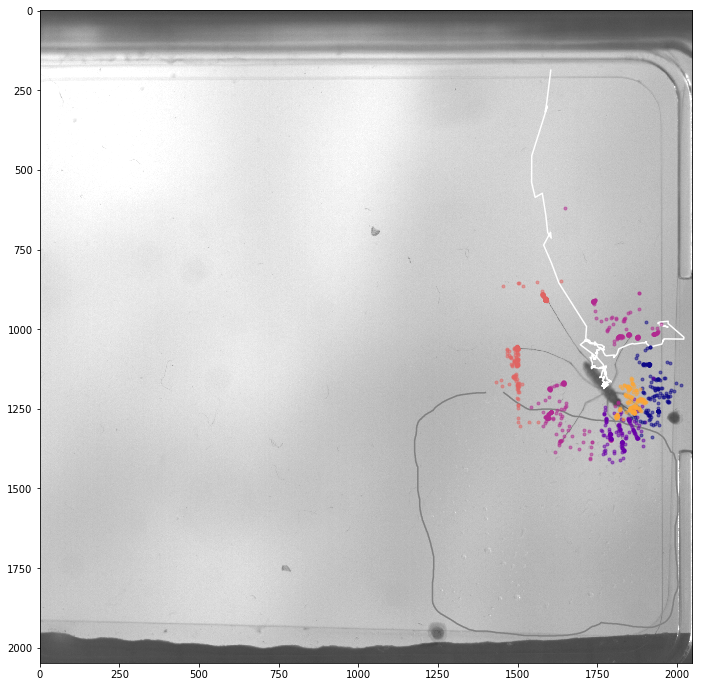

In [17]:
plt.figure(figsize=(18,12))
plt.imshow(frames[1], vmax=180, cmap = 'gray', alpha = 0.75) ###, vmin=40, vmax=180
plt.plot(DEETareaCont[:,0], DEETareaCont[:, 1], 'gray')
plt.plot(t.x, t.y, 'w')
# cnts, hierarchy = cv.findContours(DEETmask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

plotStart = 0
plotStop = np.max(t.frame) - np.min(t.frame)

ccc = plt.cm.get_cmap('plasma', 6)

for j in coordsFF3.columns.levels[0]:
    if j:
        if j == 'Head':
            color = 'k'
        elif j == 'abdomen':
            color = 'k'
        elif j == 'bottom':
            color = 'k'
        elif j == 'rightForeleg':
            color = ccc(0)
        elif j == 'leftForeleg':
            color = ccc(1)
        elif j == 'rightMiddleLeg' or j == 'leftMiddleLeg':
            color = ccc(2)
        elif j == 'rightHindLeg' or j == 'leftHindLeg':
            color = ccc(3)
        elif j == 'proboscis':
            color = ccc(4)
        elif j == 'palps':
            color = ccc(5)
        plt.plot(coordsFF3[j, 'x'].values[39100:39290], coordsFF3[j, 'y'].values[39100:39290], '-', c=color, alpha = 1)


RFLcontact = []
LFLcontact = []
LMLcontact = []
RMLcontact = []
RHLcontact = []
LHLcontact = []
PRcontact = []
# PAcontact = []
        
for k in range(39108, 39298):#np.min(t.frame), np.max(t.frame)):
    for j in coordsFF3.columns.levels[0]:
        if j:
#             print(j)
            if j == 'Head':
                color = 'k'
            elif j == 'abdomen':
                color = 'k'
            elif j == 'bottom':
                color = 'k'
            elif j == 'rightForeleg':
                color = ccc(0)
            elif j == 'leftForeleg':
                color = ccc(1)
            elif j == 'rightMiddleLeg' or j == 'leftMiddleLeg':
                color = ccc(2)
            elif j == 'rightHindLeg' or j == 'leftHindLeg':
                color = ccc(3)
            elif j == 'proboscis':
                color = ccc(4)
            elif j == 'palps':
                color = ccc(5)
            point = (coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'y'].values)
            if point[0]:
                if cv.pointPolygonTest(cnts[0], point, False) == -1.0:
                    if j == 'rightForeleg':
#                         RFLcontact = np.append(RFLcontact, k)
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
                    if j == 'rightMiddleLeg':
#                         RMLcontact = np.append(RMLcontact, k)
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
                    elif j == 'leftForeleg':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
#                         LFLcontact = np.append(LFLcontact, k)
                    elif j == 'leftMiddleLeg':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
#                         LMLcontact = np.append(LMLcontact, k)
                    elif j == 'proboscis':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
#                         PRcontact = np.append(PRcontact, k)
                    elif j == 'rightHindLeg':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
#                         RHLcontact = np.append(RHLcontact, k)
                    elif j == 'leftHindLeg':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
#                         LHLcontact = np.append(LHLcontact, k)                
#                     pass
#                     plt.plot(coordsFF2.loc[coordsFF2['', 'frame'] == k][j, 'x'].values, coordsFF2.loc[coordsFF2['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.1)
                elif cv.pointPolygonTest(cnts[0], point, False) == 1.0:
    #                 plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, 'o', c=color, alpha = 0.5)
                    if j == 'rightForeleg':
                        RFLcontact = np.append(RFLcontact, k)
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
                    if j == 'rightMiddleLeg':
                        RMLcontact = np.append(RMLcontact, k)
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
                    elif j == 'leftForeleg':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
                        LFLcontact = np.append(LFLcontact, k)
                    elif j == 'leftMiddleLeg':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
                        LMLcontact = np.append(LMLcontact, k)
                    elif j == 'proboscis':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
                        PRcontact = np.append(PRcontact, k)
                    elif j == 'rightHindLeg':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
                        RHLcontact = np.append(RHLcontact, k)
                    elif j == 'leftHindLeg':
                        plt.plot(coordsFF3.loc[coordsFF3['', 'frame'] == k][j, 'x'].values, coordsFF3.loc[coordsFF['', 'frame'] == k][j, 'y'].values, '.', c=color, alpha = 0.5)
                        LHLcontact = np.append(LHLcontact, k)
                
# plt.savefig(saveDir + 'DEET_track_p09_03.pdf')
  

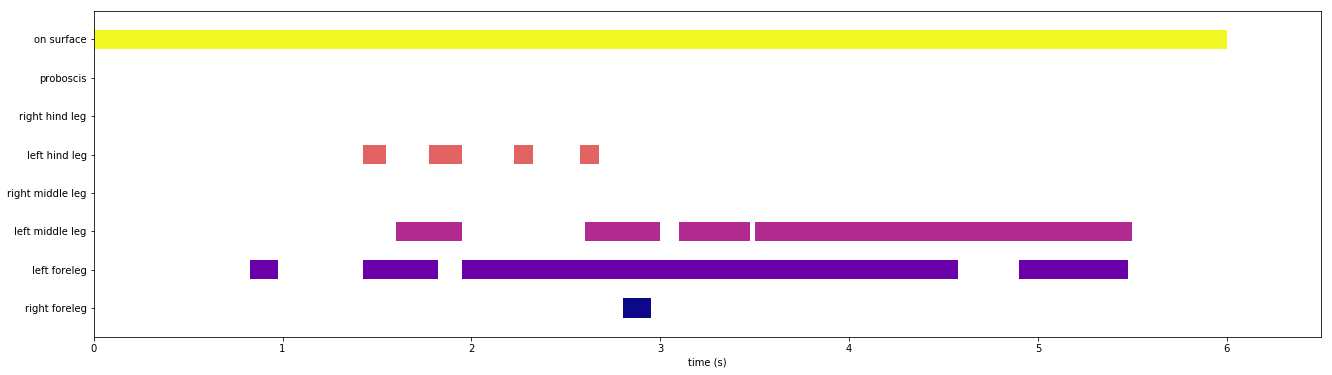

In [18]:
BPtoPlot = [RFLcontact, LFLcontact, LMLcontact, RMLcontact, LHLcontact, RHLcontact, PRcontact, t.frame.values]

fig = plt.figure(figsize=(22,6))
ax = fig.add_subplot(1, 1, 1)
iM = 0
i = 0
colorSeq = [0, 1, 2, 2, 3, 3, 4, 5]

for p in BPtoPlot:
    p = p - np.min(t.frame)
    iM = iM + 0.2
    ph = np.full((len(p)), iM)
    P = [p,ph]
    P_zipped = zip(*P)
    for P_x, P_y in P_zipped:
        ax.add_patch(plt.Rectangle((P_x, P_y), 4, 0.1, color=ccc(colorSeq[i]), ec=None))
    i += 1
    
# ax.set_xticklabels(list(range(0,26000, 100)))

plt.xlim([100, 360]) #np.max(t.frame) - np.min(t.frame) + 5])
plt.xticks(np.arange(100, 361, 40), np.arange(0,7,1))
plt.yticks(np.arange(0.25, iM + 0.5, 0.2), ('right foreleg', 'left foreleg', 'left middle leg', 'right middle leg', 'left hind leg', 'right hind leg', 'proboscis', 'on surface'))
plt.ylim([0.1, 0.2 + iM])
plt.xlabel('time (s)')

# plt.savefig(saveDir + 'DEETcontact_p09_01.pdf')



